In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) 

# Context

Для иследования нам предоставлена набор данных о пассажирах Титаника. 
Набор данных, используемый для этого исследования, является синтетическим, но основан на реальном наборе данных (в данном случае, фактических данных Титаника!) и сгенерирован с использованием CTGAN.

Выполним загрузку данных из файла csv.

In [111]:
data_titanic = pd.read_csv("train.csv")

Посмотрим на сам набор данных для иследования и определим размер данного датасета.

In [112]:
data_titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S
9,9,0,2,"Greigo, Rudy",male,66.00,0,0,6981,9.14,D2969,C


Видим что в датасете содержится 100000 строк и 12 столбцов с данными о пассажирах.

Данные представлены следующими столбцами:

    -'PassengerId': Id пассажира
    -'Survived': Выжил пассажир или нет (0-не выжил, 1-выжил)
    -'Pclass': Класс билета (1 = Первый класс, 2 = Второй класс, 3 = Третий класс)
    -'Name': Имя пассажира
    -'Sex': Пол пассажира
    -'Age': Возраст в годах
    -'SibSp': Количество братьев и сестер/супругов на борту Титаника
    -'Parch': Родителей/детей на борту Титаника
    -'Ticket': Номер билета
    -'Fare': Цена билета пассажира
    -'Cabin': Номер кабины
    -'Embarked': Порт посадки (C = Cherbourg, Q = Queenstown, S = Southampton)

Для удобства вычисления зависмостей переведем категориальную переменную Sex в числовую, где 1-male, 0-female

In [113]:
def label_race (row):
   if row['SibSp']+row['Parch'] == 0 :
      return 0
   else :
      return 1
data_titanic['Has family'] = data_titanic.apply (lambda row: label_race(row), axis=1)

Так же создадим новый столбец в котором будет находится информация есть ли у человека семья на борту, либо он едет без семьи.

    0-без семьи
    1-с семьей

In [114]:
def label_race (row):
   if row['Sex'] == 'male' :
      return 1
   if row['Sex']== 'female' :
      return 0
data_titanic['New_Sex'] = data_titanic.apply (lambda row: label_race(row), axis=1)

Теперь наши данные выглядят данным образом:

In [115]:
data_titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has family,New_Sex
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,1,1
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,0,1
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,1,1
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,0,1
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,0,1
5,5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S,0,1
6,6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S,0,1
7,7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S,1,0
8,8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S,1,1
9,9,0,2,"Greigo, Rudy",male,66.00,0,0,6981,9.14,D2969,C,0,1


# Data quality assessment

Посмотрим для каждого столбца количество ненулевых значений и тип данных.

In [116]:
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
 12  Has family   100000 non-null  int64  
 13  New_Sex      100000 non-null  int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 10.7+ MB


Итак, у нас есть 5 полей типа int, 2 поля типа float, а остальные поля типа object. Приведенная выше информация очень поможет, когда мы применим различные вычисления на уровне столбца.

Ответим на пару вопросов:
    
    -в данных не имеется числовых значений в виде строк
    
    -не существует переменных, которые являются числовыми, но на самом деле должны быть категориальными

Проверим количество нулевых значений в нашем наборе по каждому столбцу.

In [117]:
data_titanic.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
Has family         0
New_Sex            0
dtype: int64

Как видим есть некоторые столбцы в которых есть пропущенные данные (Age,Ticket,Fare,Cabin,Embarked).
Поступить можно по-разному и либо отбросить отсутствующие значения, если их немного, либо заполнить их средними или медианными значениями с помощью функции Pandas data.fillna().

Сделаем так с данными из столбца Age. Заполним пропущеные данные средними значениями по возрасту среди всех.

In [118]:
data_titanic['Age'].fillna((data_titanic['Age'].mean()), inplace=True)

Так же заполним пропущенные значения столбца Fare средними по цене. Но сделаем это в разрезе данных Pclass, так как можем заметить, что средняя цена на билет зависит от класса билета. Чем выше класс билета, тем выше будет цена на билет. 

In [119]:
data_titanic.groupby('Pclass')['Fare'].mean()

Pclass
1    92.653113
2    25.756003
3    20.618226
Name: Fare, dtype: float64

Заполним пропуски в разрезе столбца Pclass

In [120]:
data_titanic['Fare'] = data_titanic.groupby('Pclass')['Fare'].apply(lambda x: x.fillna(x.mean()))

Проверим заполнилеись ли данные

In [121]:
data_titanic.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket          4623
Fare               0
Cabin          67866
Embarked         250
Has family         0
New_Sex            0
dtype: int64

Как видим пропущенные данные заполнились средними значениями.

Посмотрим на статистические результаты по числовым данным.

In [122]:
data_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Has family,New_Sex
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.929065,0.38147,0.56114
std,28867.657797,0.494753,0.837727,18.009589,0.862566,0.950076,69.552036,0.48575,0.49625
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.680000,0.00000,0.00000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.040000,0.00000,0.00000
50%,49999.500000,0.000000,2.000000,38.355472,0.000000,0.000000,24.470000,0.00000,1.00000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.500000,1.00000,1.00000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.660000,1.00000,1.00000


Глядя на эти данные можем сделать некоторые предварительные выводы по этим данным:

-средний возраст пассажиров на титанике составлял 38,35 лет

-максимальный возраст составлял 87 лет, а минимальный 0,08 лет (1 месяц) 

-средняя цена за билет составила 43,92 доллара

-максимальная цена за билет составила 744,66 доллара, а минимальная 68 центов

Посмотрим на статистические результаты по категориальным данным.

In [123]:
data_titanic.describe(include=[object]) 

,Name,Sex,Ticket,Cabin,Embarked
count,100000,100000,95377,32134,99750
unique,92144,2,75331,26992,3
top,"Johnson, John",male,A/5,C19828,S
freq,31,56114,602,6,72139


Глядя на эти данные можем сделать некоторые предварительные выводы по этим данным:

-в базе больше всего человек с именем Johnson, John, упоминается 31 раз

-на Титанике больше всего было мужчин, их было 56114

-больше всего человек село на Титаник в Саунгемптоне, их было 72139 человек

Проверим есть ли в наших данных дубликаты:

In [124]:
True in data_titanic.duplicated().to_numpy()

False

Дубликатов в базе обноружено не было.

# Data exploration

Исследовательский анализ данных можно разделить на 4 основных типа задач:

    -Исследование каждой отдельной переменной
    -Оценка взаимосвязи между каждой переменной и целевой переменной
    -Оценка взаимодействия между переменными
    -Исследование данных во многих измерениях

## Исследование каждой отдельной переменной

Начнем с исследования переменной Survived:

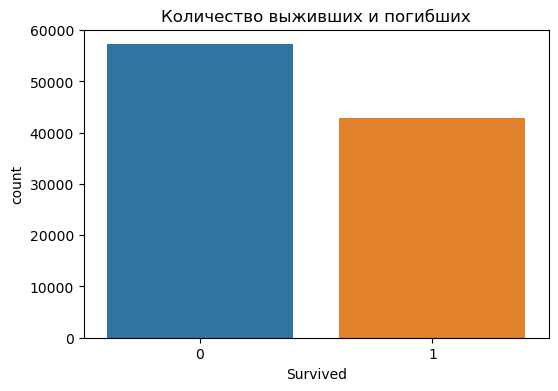

In [125]:
plt.figure(figsize=(6,4))
sns.countplot(x=data_titanic['Survived'])
plt.title("Количество выживших и погибших")
plt.show()

Можем наблюдать что погибших было больше чем выживших.

Следующая переменная которую ислледуем будет Pclass:

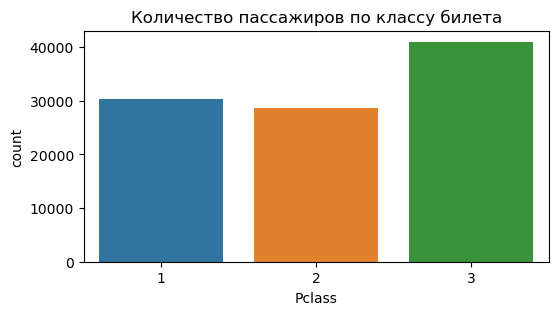

In [126]:
plt.figure(figsize=(6,3))
sns.countplot(x=data_titanic['Pclass'])
plt.title("Количество пассажиров по классу билета")
plt.show()

Можем заметить что больше всего пассажиров ехало в 3 Классе, и меньше всего во 2 Классе.

Следующая переменная которую ислледуем будет Sex:

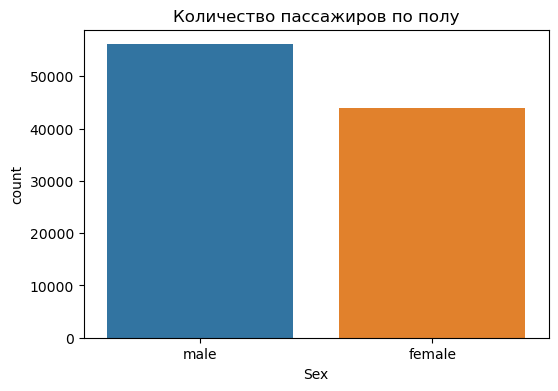

In [127]:
plt.figure(figsize=(6,4))
sns.countplot(x=data_titanic['Sex'])
plt.title("Количество пассажиров по полу")
plt.show()

Видим, что мужчин на Титанике было больше чем женщин

Следующая переменная которую ислледуем будет Age:
    
Построим гистограмму, распределение и boxplot, а так же посмотри статистические данные по переменной.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


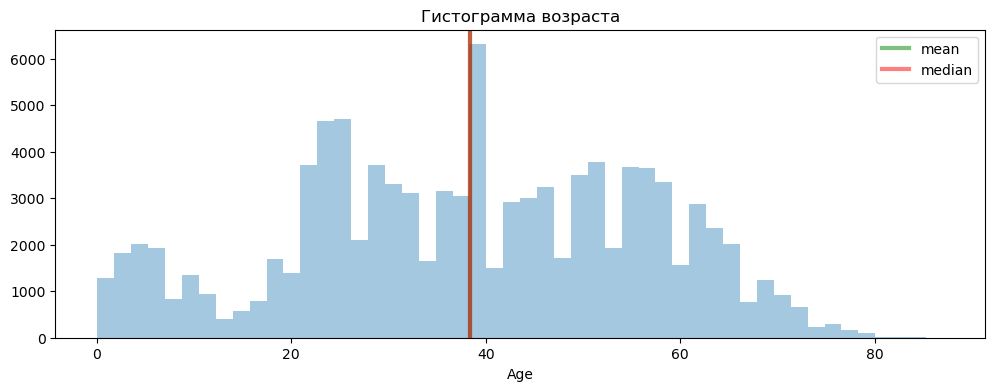

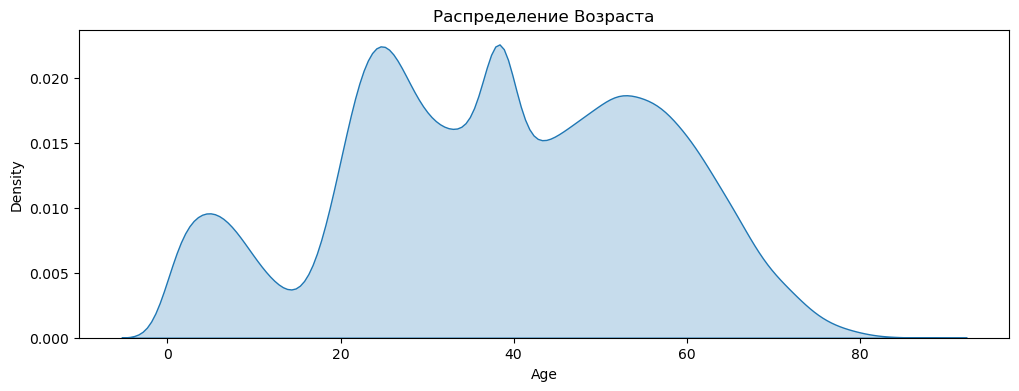

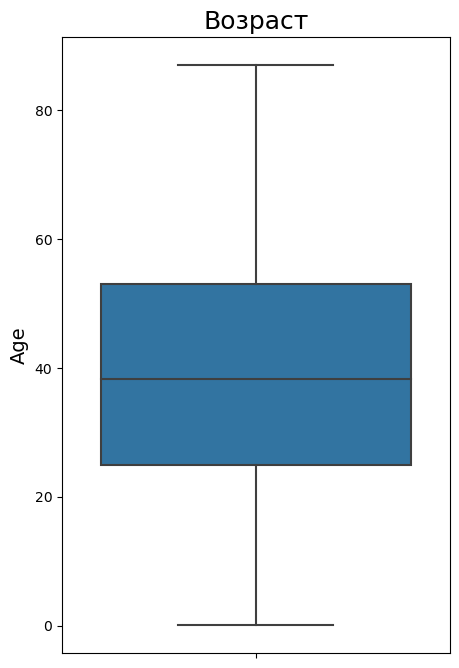

In [128]:
plt.figure(figsize=(12,4))
sns.distplot(a=data_titanic['Age'], kde=False)
plt.axvline(x=data_titanic.Age.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=data_titanic.Age.median(), linewidth=3, color='r', label="median", alpha=0.5)
plt.title("Гистограмма возраста")
plt.legend(["mean", "median"])
plt.show()
plt.figure(figsize=(12,4))
sns.kdeplot(data=data_titanic['Age'], shade=True)
plt.title("Распределение Возраста")
plt.show()
plt.figure(figsize=(5, 8))
sns.boxplot(y="Age",data=data_titanic)
plt.ylabel("Age", size=14)
plt.title("Возраст", size=18)
plt.show()

In [129]:
data_titanic['Age'].agg(["min", "max", "var", "std",'mean','median'])

min         0.080000
max        87.000000
var       324.345295
std        18.009589
mean       38.355472
median     38.355472
Name: Age, dtype: float64

Видим что медиана среднее и мода равны одному значению и равны 38.355472 годам.

По распределению можем заменить что оно 4-х модальное.

Следующая переменная которую ислледуем будет SibSp:

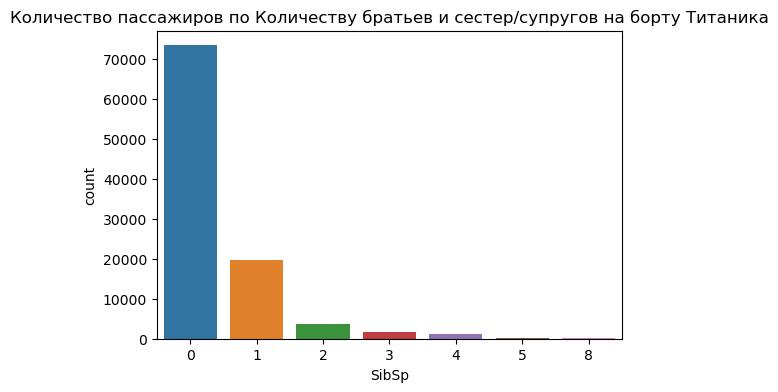

SibSp
0    73308
1    19758
2     3703
3     1635
4     1168
5      132
8      296
dtype: int64

In [130]:
plt.figure(figsize=(6,4))
sns.countplot(x=data_titanic['SibSp'])
plt.title("Количество пассажиров по Количеству братьев и сестер/супругов на борту Титаника")
plt.show()
data_titanic.groupby('SibSp').size()

Можем наблюдать, что количество братьев и сестер/супругов на борту Титаника было максимально равно нулю, а минимально 5.

Следующая переменная которую ислледуем будет Parch.

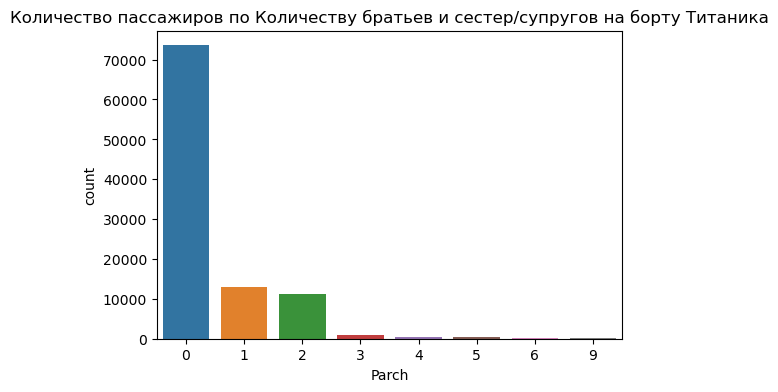

Parch
0    73540
1    12996
2    11236
3      983
4      446
5      331
6      204
9      264
dtype: int64

In [131]:
plt.figure(figsize=(6,4))
sns.countplot(x=data_titanic['Parch'])
plt.title("Количество пассажиров по Количеству братьев и сестер/супругов на борту Титаника")
plt.show()
data_titanic.groupby('Parch').size()

Можем наблюдать, что родителей/детей на борту Титаника было максимально равно нулю, а минимально 6.

Следующая переменная которую ислледуем будет Has family.

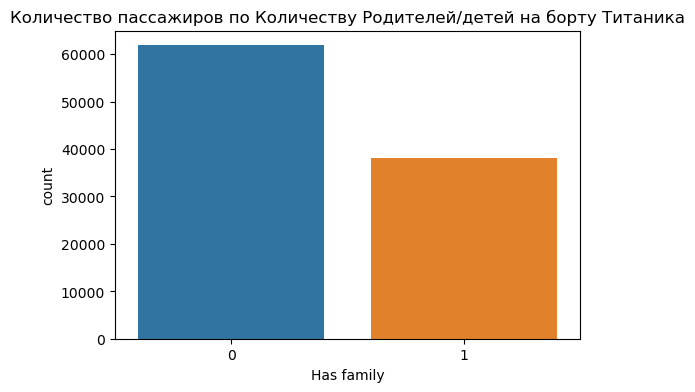

In [132]:
plt.figure(figsize=(6,4))
sns.countplot(x=data_titanic['Has family'])
plt.title("Количество пассажиров по Количеству Родителей/детей на борту Титаника")
plt.show()

Как можно заметить, большинство людей ехало в одиночку, без семей.

Следующая переменная которую ислледуем будет Fare:

Построим гистограмму, распределение и boxplot, а так же посмотри статистические данные по переменной.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


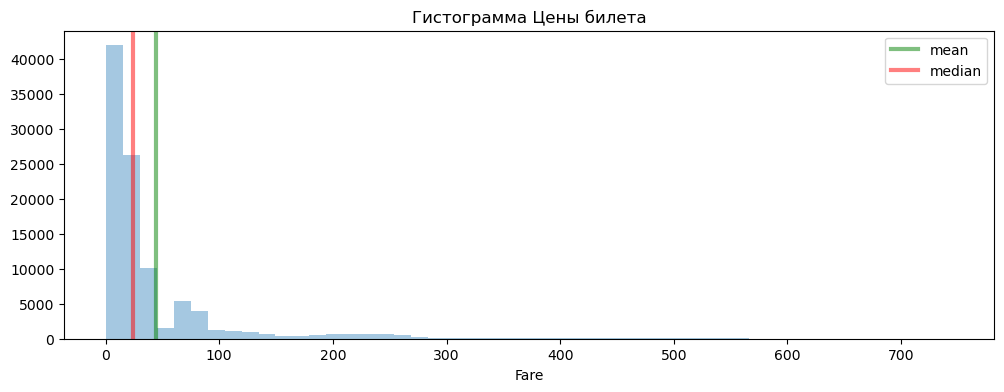

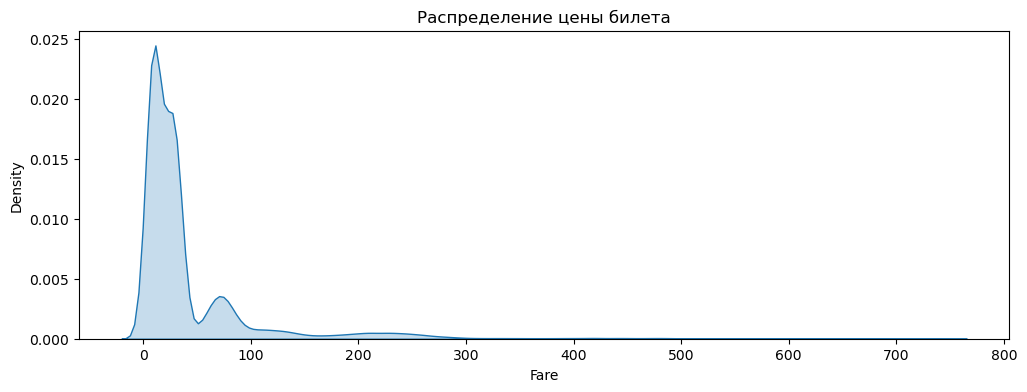

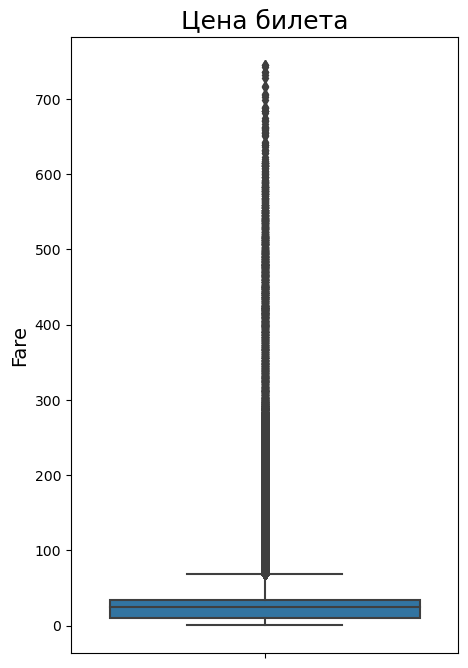

In [133]:
plt.figure(figsize=(12,4))
sns.distplot(a=data_titanic['Fare'], kde=False)
plt.axvline(x=data_titanic.Fare.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=data_titanic.Fare.median(), linewidth=3, color='r', label="median", alpha=0.5)
plt.title("Гистограмма Цены билета")
plt.legend(["mean", "median"])
plt.show()
plt.figure(figsize=(12,4))
sns.kdeplot(data=data_titanic['Fare'], shade=True)
plt.title("Распределение цены билета")
plt.show()
plt.figure(figsize=(5, 8))
sns.boxplot(y="Fare",data=data_titanic)
plt.ylabel("Fare", size=14)
plt.title("Цена билета", size=18)
plt.show()

In [134]:
data_titanic['Fare'].agg(["min", "max", "var", "std",'mean','median'])

min          0.680000
max        744.660000
var       4837.485681
std         69.552036
mean        43.929065
median      24.470000
Name: Fare, dtype: float64

Можем заметить, что медиана меньше среднего и равны соотвественно 24,47 и 43,92 доллара.

Максимальная цена равно 744,66 доллара, а минимальная 68 центов.

Распределение имеет positive skewness.

Следующая переменная которую ислледуем будет Cabin. Мы возьмем первую букву кабины пассажира для оценки.

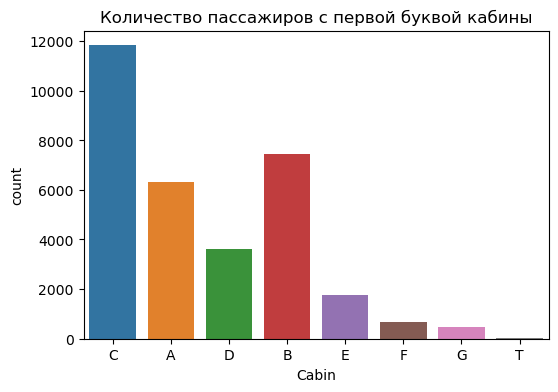

In [135]:
plt.figure(figsize=(6,4))
sns.countplot(x=data_titanic['Cabin'].str[:1])
plt.title("Количество пассажиров с первой буквой кабины")
plt.show()

Можем наблюдать, что больше всего человек жили в кабине с буквой С и меньше всего с кабиной с буквой T.

Следующая переменная которую ислледуем будет Embarked.

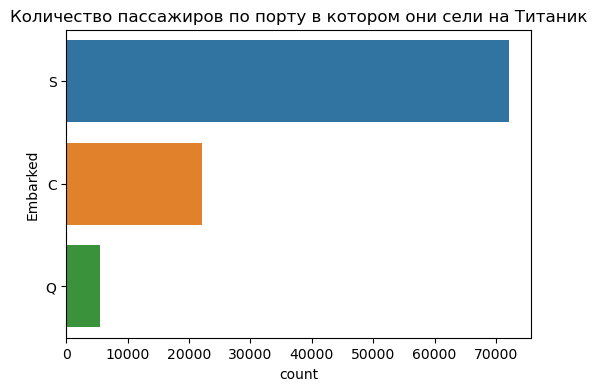

In [136]:
plt.figure(figsize=(6,4))
sns.countplot(y=data_titanic['Embarked'])
plt.title("Количество пассажиров по порту в котором они сели на Титаник")
plt.show()

Можем наблюдать, что больше всего пассажиров отправились из Саунгемптона, а меньше всего из Квинстона.

## Оценка взаимодействия между переменными

Выведем матрицу корреляции для оценки зависимости между переменными:

In [137]:
data_titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Has family,New_Sex
PassengerId,1.000000,0.001956,-0.000893,-0.002611,0.001000,0.000411,-0.001057,0.002113,0.000493
Survived,0.001956,1.000000,-0.289723,0.102186,-0.007587,0.023352,0.187507,0.060086,-0.507260
Pclass,-0.000893,-0.289723,1.000000,-0.254843,-0.051436,-0.041848,-0.417566,-0.137552,0.198617
Age,-0.002611,0.102186,-0.254843,1.000000,-0.110755,-0.123663,0.107338,-0.119512,-0.080341
SibSp,0.001000,-0.007587,-0.051436,-0.110755,1.000000,0.213126,0.059400,0.587090,-0.030627
Parch,0.000411,0.023352,-0.041848,-0.123663,0.213126,1.000000,0.061530,0.609236,-0.087666
Fare,-0.001057,0.187507,-0.417566,0.107338,0.059400,0.061530,1.000000,0.122956,-0.143495
Has family,0.002113,0.060086,-0.137552,-0.119512,0.587090,0.609236,0.122956,1.000000,-0.109844
New_Sex,0.000493,-0.507260,0.198617,-0.080341,-0.030627,-0.087666,-0.143495,-0.109844,1.000000


Как видим некоторые переменные взаимодействуют с другими, например такие как (New_Sex,Survived), (Pclass,Survived),  (Pclass,Fare),(Age,Pclass)

Можем так же построить Heatmap, для графического тобржаения силы взаимодействия

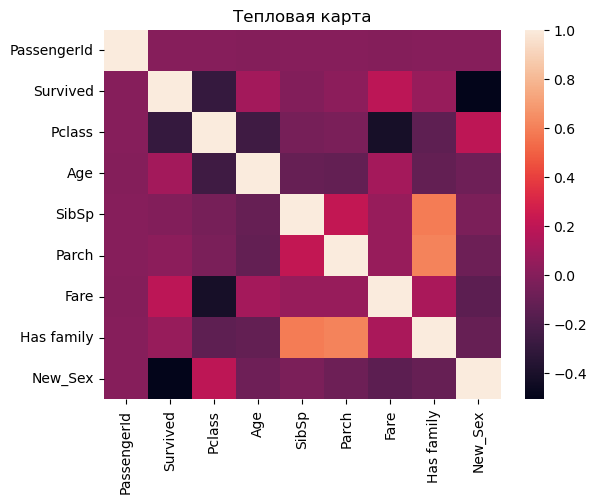

In [138]:
sns.heatmap(data_titanic.corr())
plt.title("Тепловая карта")
plt.show()

Видим некоторые выраженные зависмости которые мы описали.

Разберем некоторые из них и выразим графически

### Вопрос 1: Какая зависимость выживаемости от пола в разрезе класса билета?

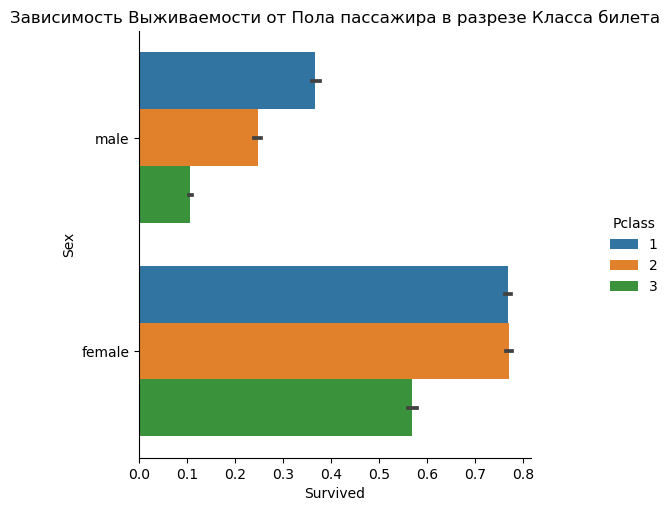

In [139]:
sns.catplot(y="Sex", x="Survived", hue="Pclass", kind="bar", data=data_titanic)
plt.title("Зависимость Выживаемости от Пола пассажира в разрезе Класса билета")
plt.show()

Как мы видим на графике, выживаемость зависит от класса билета, чем вышен класс билета тем больше выживаемость.

Так же видим что выживаемость зависит от пола: выжить женщиной на титанике шанс намного больше.

### Вопрос 2: Как  зависит выживаемость от возраста

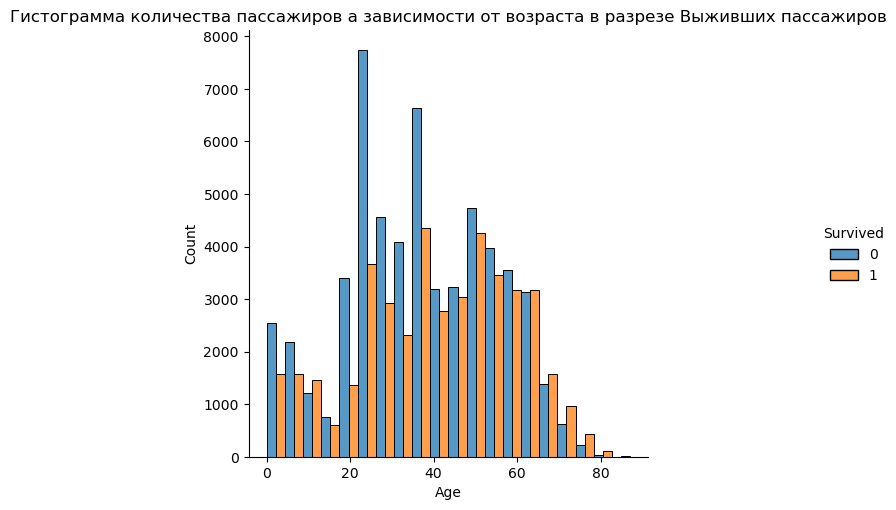

In [140]:
sns.displot(data_titanic, x="Age", hue="Survived", multiple="dodge", bins=20)
plt.title("Гистограмма количества пассажиров а зависимости от возраста в разрезе Выживших пассажиров")
plt.show()

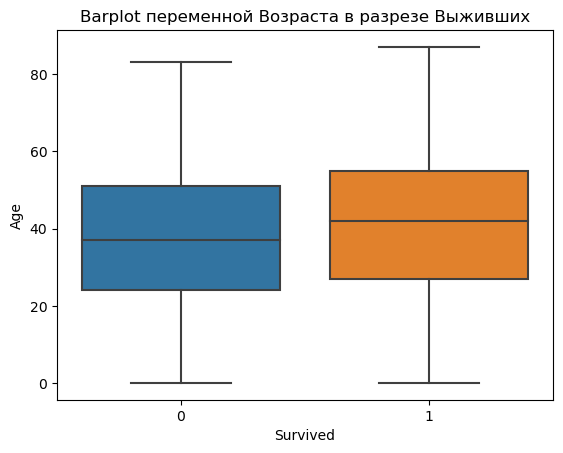

In [141]:
ax = sns.boxplot(x="Survived", y="Age", data=data_titanic)
plt.title("Barplot переменной Возраста в разрезе Выживших")
plt.show()

Как можем заметить меньше всего выживали молодые люди (18-40 лет).

Так же можем увидеть что медиана возраста выживших больше чем погибших.

### Вопрос 3: Как  зависит стоимость билета  от класса билета,  а так же в разрезе от пола пассажира?

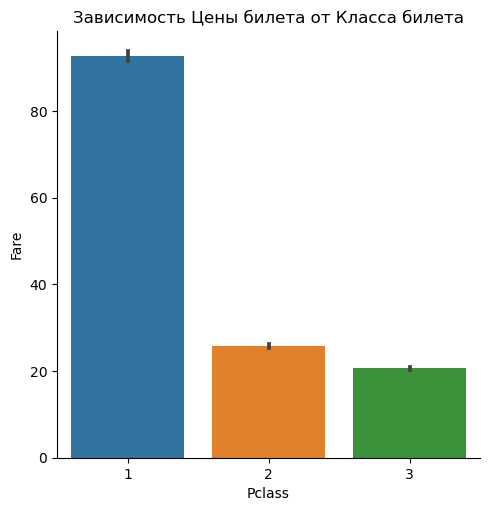

In [142]:
sns.catplot(x="Pclass", y="Fare", kind="bar", data=data_titanic)
plt.title("Зависимость Цены билета от Класса билета")
plt.show()

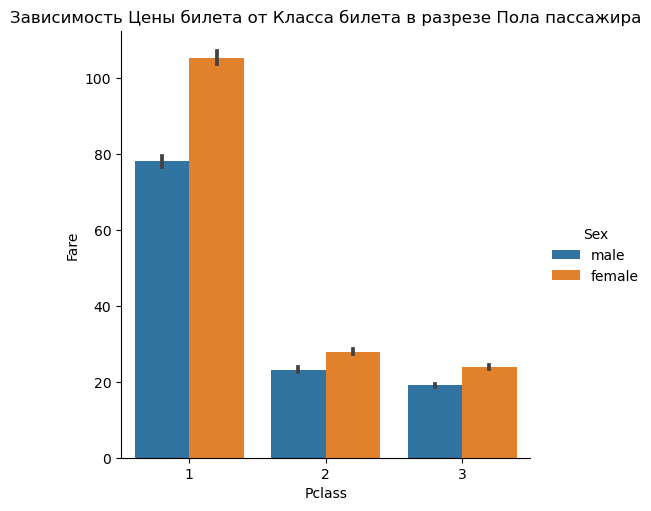

In [143]:
sns.catplot(x="Pclass", y="Fare",hue='Sex', kind="bar", data=data_titanic)
plt.title("Зависимость Цены билета от Класса билета в разрезе Пола пассажира")
plt.show()

Можем сделать вывод что дороже всего стоят билеты первого класса, а меньше всего 3 класса.

Так же по второму графику видим, что женщины заплатили за билет больше чем мужчины во всех классах билетов.

### Вопрос 4: Какая зависимость между классом билета и возрастом?

Есть предположение что люди постарше брать билет подороже.

<Figure size 2600x2400 with 0 Axes>

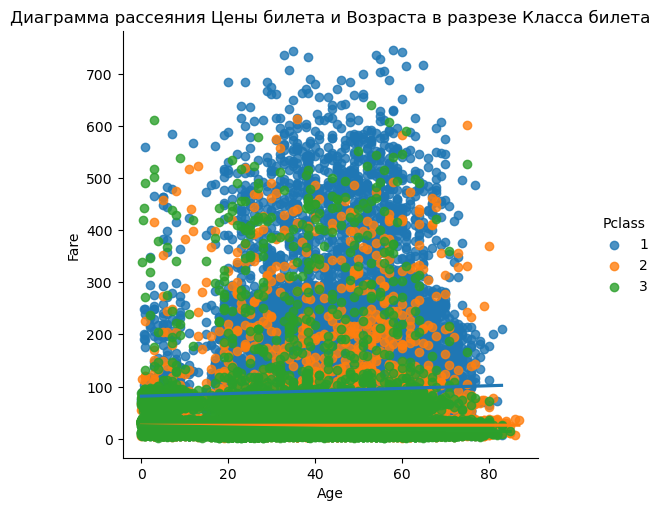

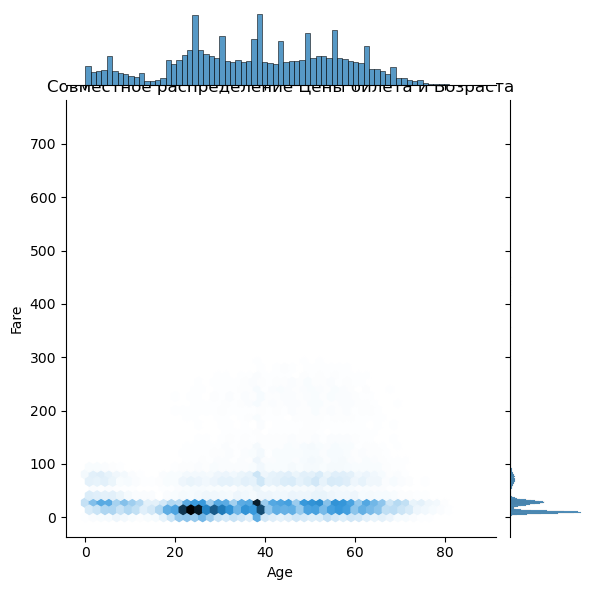

In [144]:
#sns.catplot(x="Age", y="Fare", kind="bar", data=data_titanic)
#sns.scatterplot(data=data_titanic, x="Age", y="Fare",hue="Pclass")
plt.figure(figsize=(26,24))
sns.lmplot(x="Age", y="Fare", hue="Pclass", data=data_titanic)
plt.title("Диаграмма рассеяния Цены билета и Возраста в разрезе Класса билета")
plt.show()
sns.jointplot(data=data_titanic, x="Age", y="Fare", kind="hex")
plt.title("Совместное распределение Цены билета и Возраста")
plt.show()

Как можем заметить зависимости цены от возраста не имееется. Даже в разрезе класса билета.

### Вопрос 5: Как зависит Возраст от Класса билета  в разрезе пола?

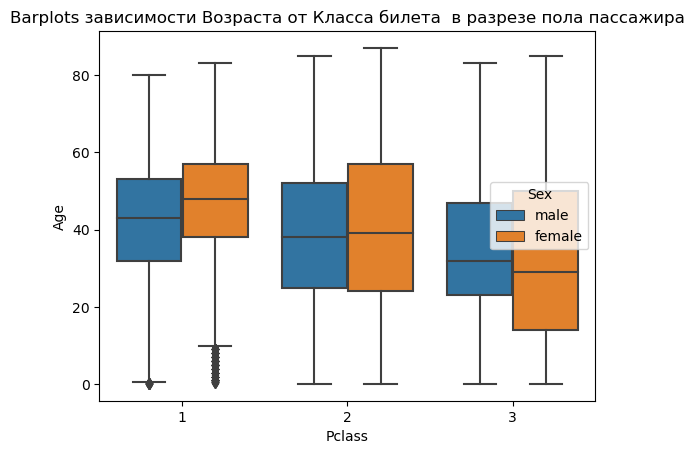

In [145]:
ax = sns.boxplot(x="Pclass", y="Age",hue="Sex", data=data_titanic)
plt.title("Barplots зависимости Возраста от Класса билета  в разрезе пола пассажира")
plt.show()

Данный график очень интересен. Глядя на него можем сделать несколько выводов:
    
    -Чем лучше класс билета, тем больше медиана возраста пассажиров.
    -Медиана возраста женщин во всех классах билетов, кроме третьего, там он был больше чем у мужчин

### Вопрос 6: Как зависит Возраст от Класса билета  в разрезе Выживаемости?

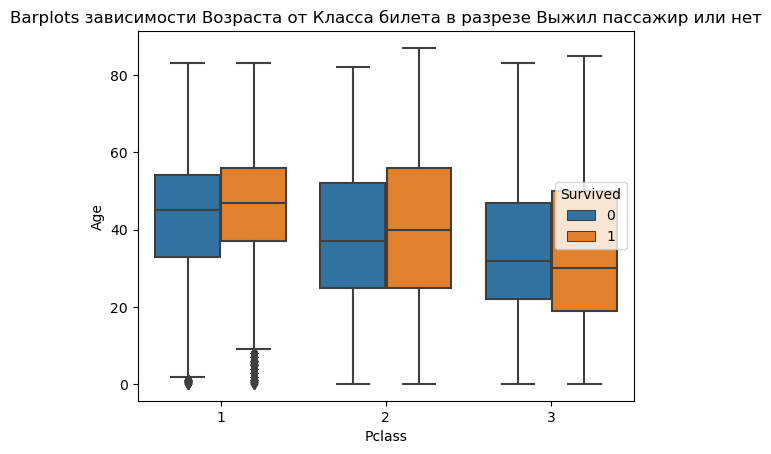

In [146]:
ax = sns.boxplot(x="Pclass", y="Age",hue="Survived", data=data_titanic)
plt.title("Barplots зависимости Возраста от Класса билета в разрезе Выжил пассажир или нет")
plt.show()

Данный график очень интересен. Глядя на него можем сделать вывод:

    -Медиана возраста выживших больше чем погибших только в 1 и во 2 классе.
    -Чем моложе человек был в третьем классе тем мешьше шансов было у него выжить.

### Вопрос 7: Как зависит  Выживаемость от Класса билета?

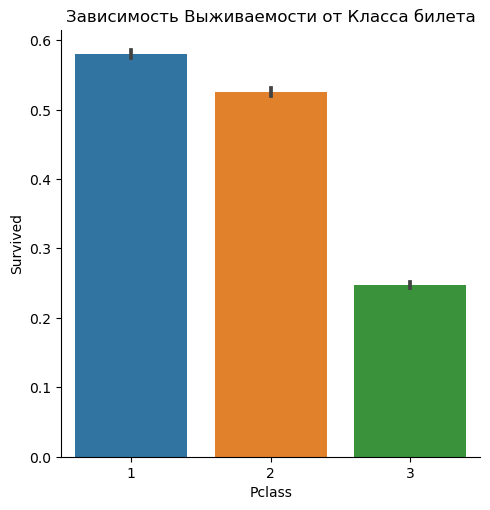

In [147]:
sns.catplot(x="Pclass", y="Survived", kind="bar", data=data_titanic)
plt.title("Зависимость Выживаемости от Класса билета")
plt.show()

Отлично видно:
    
    -Чем выше класс билета тем больше шанс выжить!
    -Так как раньше мы выяснили что чем выше класс тем дороже был билет, то можем сделать вывод: Чем богаче был человек, тем больше его шансы на выживание на Титанике!
    

Проверим наш последний вывод графически:

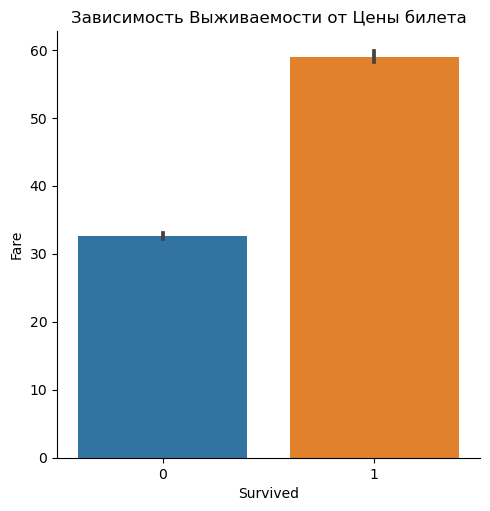

In [148]:
sns.catplot(x="Survived", y="Fare", kind="bar", data=data_titanic)
plt.title("Зависимость Выживаемости от Цены билета")
plt.show()

Отлично! Наша гипотеза подтвердилась!

### Вопрос 8: Как зависит выживаемость от порта в котором человек сел на Титаник, а так же в разрезе Класса билета?

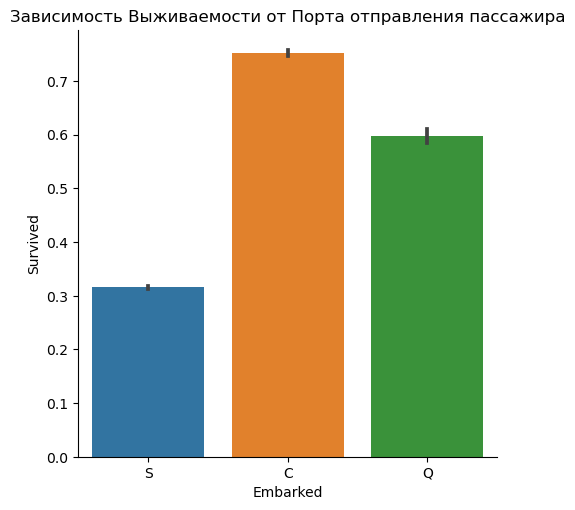

In [149]:
sns.catplot(x="Embarked", y="Survived", kind="bar", data=data_titanic)
plt.title("Зависимость Выживаемости от Порта отправления пассажира")
plt.show()

Удивительно, но такая зависимость существует.

Шансы выжить больше если сел в Cherbourg и меньше всего если в Southampton. Может это зависит от доходов в этом городе.

Проверим данную гепотезу.

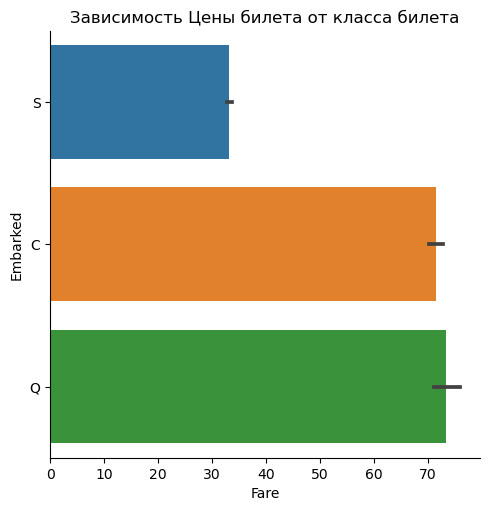

In [150]:
sns.catplot(y="Embarked", x="Fare", kind="bar", data=data_titanic)
plt.title("Зависимость Цены билета от класса билета")
plt.show()

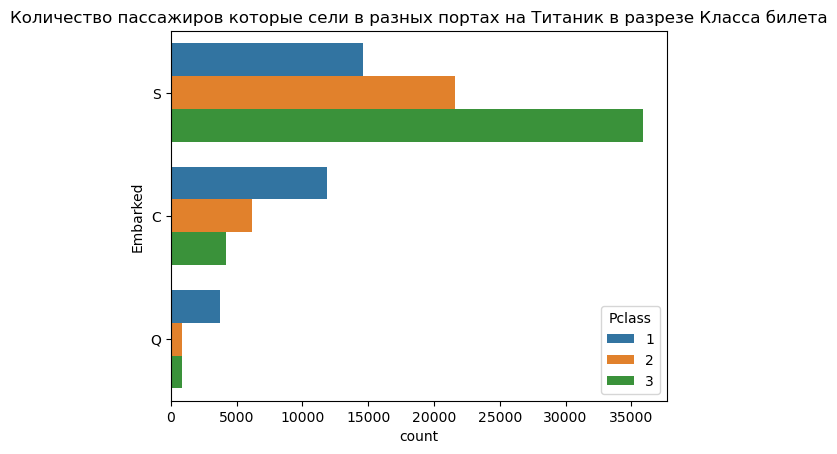

In [151]:
sns.countplot(y=data_titanic['Embarked'],hue=data_titanic['Pclass'])
plt.title("Количество пассажиров которые сели в разных портах на Титаник в разрезе Класса билета")
plt.show()

Наша гипотеза продтвердилась. Средняя цена на билет в Southampton меньше чем в других городах.

Все потому что там было продано больше билетов наименьшего класса чем в других городах.

То есть богатых людей в городе Southampton село меньше чем в других городах.

### Вопрос 9: Существуют ли отдельные кластеры в совместном распределении Возраста и Цены за билет?

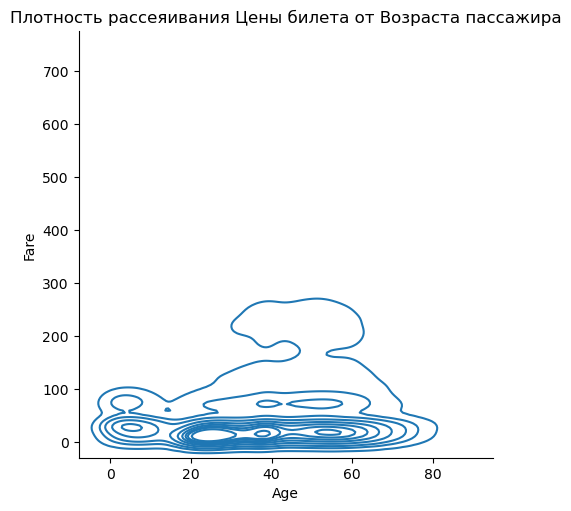

In [152]:
sns.displot(data_titanic, x="Age", y="Fare", kind="kde")
plt.title("Плотность рассеяивания Цены билета от Возраста пассажира")
plt.show()

По данному графику можно выделить наиболее популярные области (кластеры) плотности значений в зависимости друг от друга.

### Вопрос 10: Как зависит выживаемость от того в одиночку ехал человек или с семьей?

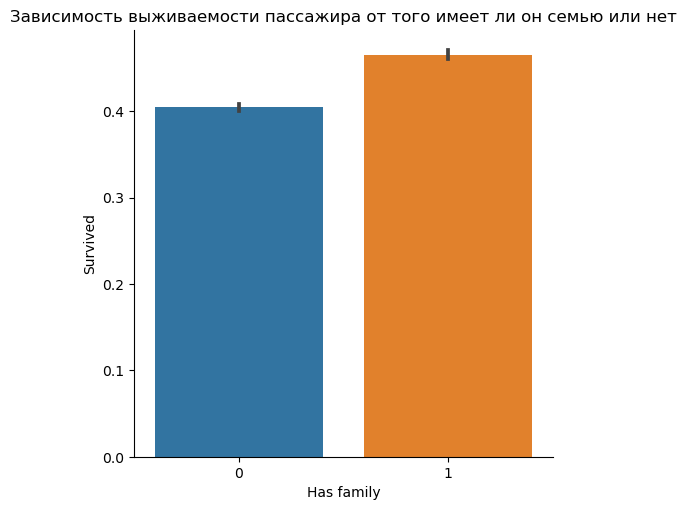

In [153]:
sns.catplot(x="Has family", y="Survived", kind="bar", data=data_titanic)
plt.title("Зависимость выживаемости пассажира от того имеет ли он семью или нет")
plt.show()

Как можем видеть выживаемость больше у тех у кого на борту была семья. А те кто ехал в одиночку к сожалению умирали чаще.

### Вопрос 11: Как зависит Класс билета и имется ли у человека семья на борту Титаника в разрезе класса билета?

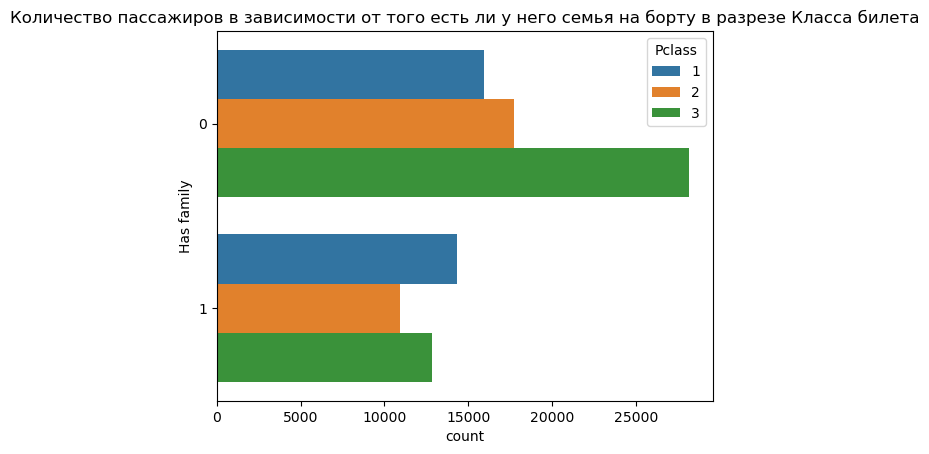

In [154]:
sns.countplot(y=data_titanic['Has family'],hue=data_titanic['Pclass'])
plt.title("Количество пассажиров в зависимости от того есть ли у него семья на борту в разрезе Класса билета")
plt.show()

Интересная зависимость. Большинство одиночек ехало в 3 классе. А среди людей с семьёй  есть небольшое преобладание билетов первого класса.

### Вопрос 12: Как зависит Возраст от того была ли у пассажира семья на борту?

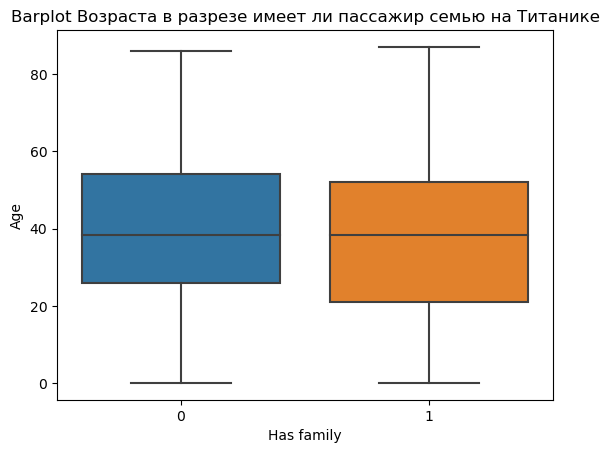

In [155]:
ax = sns.boxplot(x="Has family", y="Age", data=data_titanic)
plt.title("Barplot Возраста в разрезе имеет ли пассажир семью на Титанике")
plt.show()

Как можем заметить, разницы между медианой возраста одиночек и семейных не существует.

### Вопрос 13:  Есть ли интересные данные по количеству пассажиров в зависимости от возраста с разрезом есть ли у них семья или нет на борту?

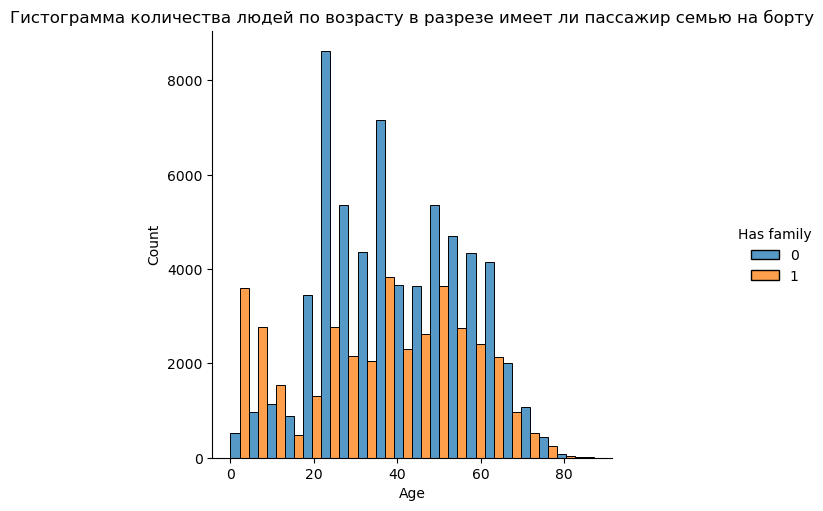

In [156]:
sns.displot(data_titanic, x="Age", hue="Has family", multiple="dodge",bins=20)
plt.title("Гистограмма количества людей по возрасту в разрезе имеет ли пассажир семью на борту")
plt.show()

Получаем интересные результаты. Видим что есть явные промежутки до лет 16, что эта категория пассажиров едет с семьей, так как это дети и едут вероятно всего с родителями.


### Вопрос 14: Какое количество пассажиров  с одинаковой первой буквой кабины в разрезе Выживаемости?

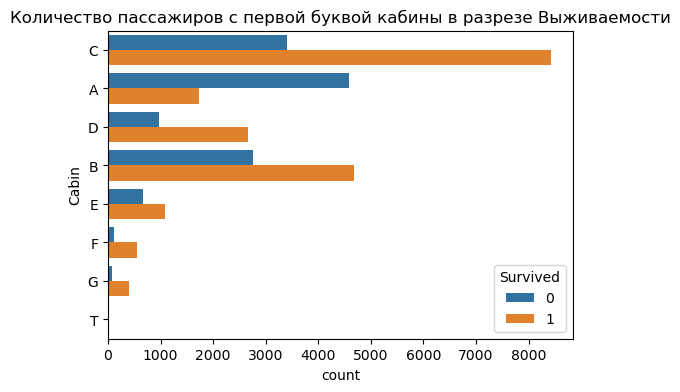

In [157]:
plt.figure(figsize=(6,4))
sns.countplot(y=data_titanic['Cabin'].str[:1], hue=data_titanic["Survived"])
plt.title("Количество пассажиров с первой буквой кабины в разрезе Выживаемости")
plt.show()

Можем сделать интересный вывод: пассажиров с первой буквой кабины A было больше погибших чем выживших, в отличии от всех других кабин.

# Summary

Мы получили сырые данные по пассажирам Титаника, а в итоге получили интересные выводы по эти данным.

Данное задание было интересно в плане изучения данных, а так же визуализации этих данных помогла лучше понять некоторые зависимости, которые не видны на первый взгляд только по данным.

Исследуя данные и визуализировав их мы получили некоторые выводы:
    
    -выживаемость зависит от класса билета, чем выше класс билета тем больше выживаемость.
    -выживаемость зависит от пола: выжить женщиной на титанике шанс намного больше
    -меньше всего выживали молодые люди (18-40 лет)
    -дороже всего стоят билеты 1-ого класса, а меньше всего 3-ого класса
    -женщины заплатили за билет больше чем мужчины во всех классах билетов
    -чем лучше класс билета, тем больше медиана возраста пассажиров
    -медиана возраста женщин во всех классах билетов выше чем у мужчин, кроме третьего, там он был больше чем у мужчин
    -чем моложе человек был в третьем классе тем мешьше шансов было у него выжить
    -чем выше класс билета тем больше шанс выжить
    -чем богаче был человек (дороже у него был билет), тем больше его шансы на выживание на Титанике
    -шансы выжить больше если сел в Cherbourg и меньше всего если в Southampton
    -средняя цена на билет в Southampton меньше чем в других городах
    -в Southampton было продано больше билетов наименьшего класса чем в других городах
    -выживаемость больше у тех у кого на борту была семья. А те кто ехал в одиночку к сожалению умирали чаще
    -большинство одиночек ехало в 3-ем классе. А среди людей с семьёй есть небольшое преобладание билетов первого класса
    -пассажиров с первой буквой кабины A было больше погибших чем выживших, в отличии от всех других кабин   